# 人口密度データ

- 参考にさせていただいた記事：https://qiita.com/biskwikman/items/b09de2b470e1dabcaed2
- 元データ：https://www.e-stat.go.jp/gis/statmap-search?page=1&type=2&aggregateUnitForBoundary=A&toukeiCode=00200521&toukeiYear=2015&serveyId=A002005212015&coordsys=1&format=shape

元データの`h27ka08.json`はGithubには置いていません。上記URLから取得してください。

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

prefecture = 'ibaraki'
density = gpd.read_file("./dataset/ibaraki/human_density/h27ka08.json")

In [3]:
# 東京は例外処理が必要
# filter = tokyo["SITYO_NAME"] == ""
# tokyo_l = tokyo[filter]
# tokyo_nw = tokyo_l[tokyo_l.HCODE != 8154]
# tokyo_nw.plot()

In [4]:
density.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,N_CITY,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,082010010,08,201,001000,茨城県,水戸市,青柳町,,8101,2285673.606,...,,,青柳町,23,2005,836,140.48067,36.39406,0010-00,"POLYGON ((140.47921 36.38059, 140.48036 36.381..."
1,08201002001,08,201,002001,茨城県,水戸市,赤塚１丁目,,8101,563757.174,...,,,赤塚１丁目,34,2876,1354,140.41555,36.38418,0020-01,"POLYGON ((140.42122 36.38269, 140.42116 36.382..."
2,08201002002,08,201,002002,茨城県,水戸市,赤塚２丁目,,8101,335358.979,...,,,赤塚２丁目,12,1063,459,140.41613,36.38862,0020-02,"POLYGON ((140.41108 36.38491, 140.41266 36.385..."
3,082010030,08,201,003000,茨城県,水戸市,圷大野,,8101,1070799.761,...,,,圷大野,4,182,55,140.53412,36.35735,0030-00,"POLYGON ((140.54376 36.36350, 140.54321 36.363..."
4,082010040,08,201,004000,茨城県,水戸市,曙町,,8101,79852.612,...,,,曙町,11,677,372,140.44398,36.39466,0040-00,"POLYGON ((140.44371 36.39355, 140.44385 36.393..."


<AxesSubplot:>

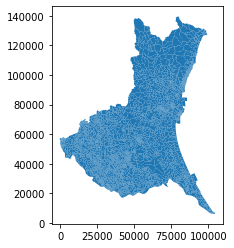

In [5]:
density_crs = {'proj': 'laea', 'lat_0': '35.6895', 'lon_0': '139.6917', 'elipse': 'WGS84', 'datum': 'WGS84', 'units': 'm', 'no_defs': True}
density_prj = density.to_crs(density_crs)
density_prj.plot()

In [6]:
density_pd = density_prj.assign(POP_DENSITY=1000*density_prj.JINKO/density_prj.AREA)
density_pd.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry,POP_DENSITY
0,082010010,08,201,001000,茨城県,水戸市,青柳町,,8101,2285673.606,...,,青柳町,23,2005,836,140.48067,36.39406,0010-00,"POLYGON ((70662.919 76965.787, 70765.887 77017...",0.877203
1,08201002001,08,201,002001,茨城県,水戸市,赤塚１丁目,,8101,563757.174,...,,赤塚１丁目,34,2876,1354,140.41555,36.38418,0020-01,"POLYGON ((65457.735 77157.912, 65452.780 77181...",5.101487
2,08201002002,08,201,002002,茨城県,水戸市,赤塚２丁目,,8101,335358.979,...,,赤塚２丁目,12,1063,459,140.41613,36.38862,0020-02,"POLYGON ((64546.676 77397.521, 64687.756 77447...",3.169738
3,082010030,08,201,003000,茨城県,水戸市,圷大野,,8101,1070799.761,...,,圷大野,4,182,55,140.53412,36.35735,0030-00,"POLYGON ((76471.304 75116.937, 76421.771 75133...",0.169966
4,082010040,08,201,004000,茨城県,水戸市,曙町,,8101,79852.612,...,,曙町,11,677,372,140.44398,36.39466,0040-00,"POLYGON ((67466.922 78378.254, 67479.120 78382...",8.478120


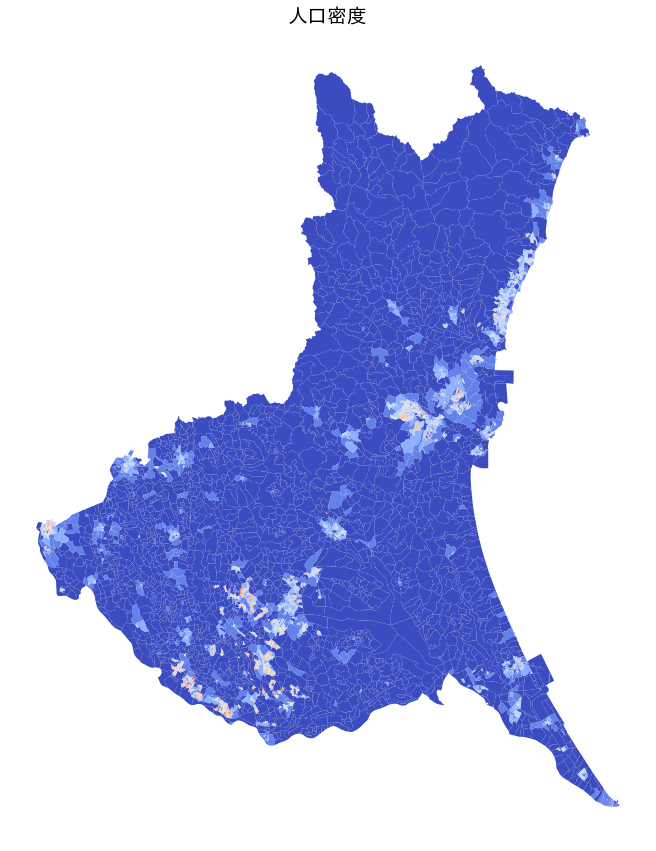

In [9]:
# matplotlib.rc('font', family='TakaoPGothic')
plt.rcParams['font.family'] = 'IPAGothic'
f, ax = plt.subplots(figsize=(15, 15), subplot_kw={'aspect': 'equal'})

density_pd.plot(column='POP_DENSITY', scheme='Fisher_Jenks', k=9, cmap="coolwarm", ax=ax, legend=False)

# leg = ax.get_legend()
# leg.set_bbox_to_anchor([0.2, 0.4])
ax.set_axis_off()
ax.set_title('人口密度', fontsize=20)

plt.savefig('./results/'+prefecture+'/human_density_'+prefecture+'.png')

In [ ]:
density_pd = density_pd[['Y_CODE', 'X_CODE', 'POP_DENSITY']]
density_pd.to_excel('dataset/'+prefecture+'/human_density_'+prefecture+'.xlsx')

In [ ]:
density_pd